## Predict Customer Clicked Ads Classification by Using Machine Learning

### Library and Data Import

In [1]:
# Library import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from sklearn.preprocessing import MinMaxScaler
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
# Data import
df = pd.read_csv('Clicked Ads Dataset.csv')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


### Data Cleansing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


We will change the 'Male' column into 'Gender'.

In [4]:
df = df.rename(columns= {'Male':'Gender'})

We will drop 'Unamed: 0' column because it doesnt give any information

In [5]:
df.drop(columns='Unnamed: 0', inplace = True)

<b>Missing Value handling</b>

In [6]:
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Gender                       3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

There are 4 columns that have missing value, to handle this case, we will check their distribution first so we can decide how to handle those missing value.

<Axes: xlabel='Daily Time Spent on Site', ylabel='Density'>

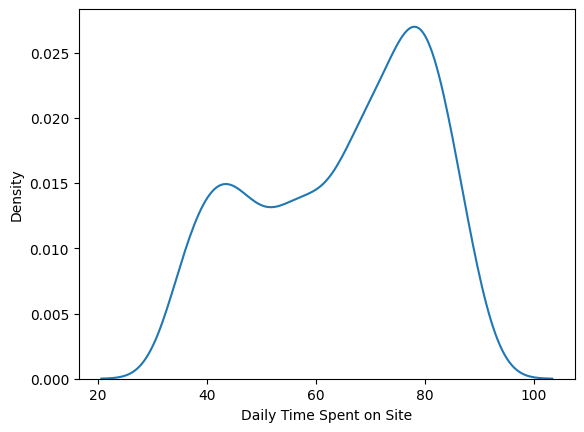

In [7]:
sns.kdeplot(df['Daily Time Spent on Site'])

The 'Daily Time Spent on Site' column has distribution that hampir normal, so we will imputate the missing value with the mean

<Axes: xlabel='Area Income', ylabel='Density'>

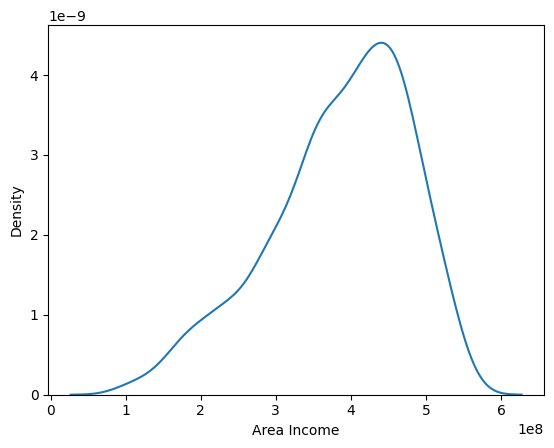

In [8]:
sns.kdeplot(df['Area Income'])

The 'Area Income' column has distribution that slightly skewed, so we will imputate the missing value with the median of the data

<Axes: xlabel='Daily Internet Usage', ylabel='Density'>

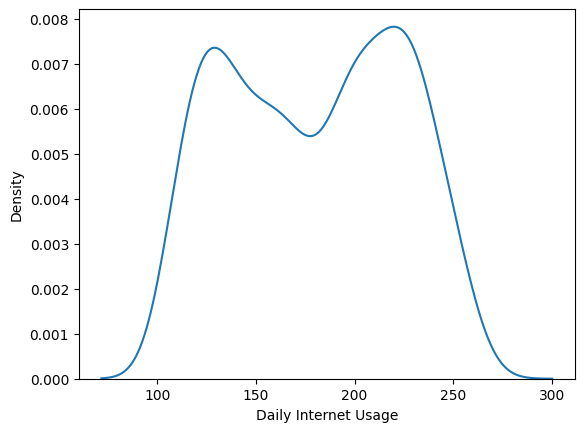

In [9]:
sns.kdeplot(df['Daily Internet Usage'])

The 'Daily Internet Usage' column has distribution that hampir normal, so we will imputate the missing value with the mean

<Axes: xlabel='Gender', ylabel='count'>

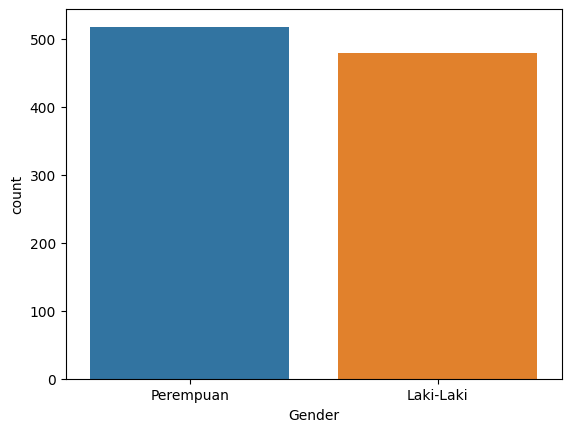

In [10]:
sns.countplot(x = df['Gender'])

We will imputate the missing data for Gender column with the mode of the data

In [11]:
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean())
df['Area Income'] = df['Area Income'].fillna(df['Area Income'].median())
df['Daily Internet Usage'] = df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean())
df['Gender'] = df['Gender'].fillna('Perempuan')

In [12]:
df.isnull().sum().sum()

0

There is no missing value anymore

In [13]:
df.duplicated().sum()

0

There is no duplicated value

we will make a new column called Recency

In [14]:
import datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M')
today = datetime.date.today()
df['Recency'] = (today - df['Timestamp'].dt.date).dt.days


### Exploratory Data Analysis

In [15]:
label = ['No', 'Yes']
Click_chart = px.pie(df, values=df['Clicked on Ad'].value_counts().values, color=df['Clicked on Ad'].value_counts().index, names=label, color_discrete_sequence = ["#F66B0E","#035397"], hole=0.5)
Click_chart.update_traces(textposition="outside", textfont=dict(color="black",size=13), textinfo="label+percent",pull=[0.1,0,0,0,0],rotation = -115)
Click_chart.update_layout(title="<b>Customer Clicked on Ad Distribution</b>", title_font=dict(size=16))
Click_chart

So the ration between customers who click the ad and customers who dont click the ad is same. Company can increase the number of customer who click the ad by choosing the right strategy. We will analyze the customers behaviour first, so we can get insight from it.

In [16]:
label = ['Female', 'Male']
gender_chart = px.pie(df, values=df['Gender'].value_counts().values, color=df['Gender'].value_counts().index, names=label, color_discrete_sequence=["#FF9999", '#77E4D4'], hole=0.5)
gender_chart.update_traces(textposition="outside", textfont=dict(color="black",size=13), textinfo="label+percent",pull=[0.1,0,0,0,0],rotation = -115)
gender_chart.update_layout(title="<b>Customer Gender Distribution</b>", title_font=dict(size=16))
gender_chart

The distribution of customer's gender is in the same ratio

In [17]:
gender_group = df.groupby(['Gender', 'Clicked on Ad']).agg(count = ('Gender', 'count')).reset_index()
gender_group

,Gender,Clicked on Ad,count
0,Laki-Laki,No,248
1,Laki-Laki,Yes,231
2,Perempuan,No,252
3,Perempuan,Yes,269


In [18]:
dist3 = ff.create_distplot([df[df['Clicked on Ad'] == 'Yes']['Recency'], df[df['Clicked on Ad'] == 'No']['Recency']], ['Yes', 'No'], bin_size=1, show_rug=False, colors = ["#035397","#F66B0E"])
dist3.update_layout(title_text='Daily Time Spent on Site distribution<br>by Clicked on Ad', width = 600, height = 500)
dist3.show()

In [19]:
import plotly.figure_factory as ff
dist1 = ff.create_distplot([df[df['Clicked on Ad'] == 'Yes']['Age'], df[df['Clicked on Ad'] == 'No']['Age']], ['Yes', 'No'], bin_size=1, show_rug=False, colors = ["#035397","#F66B0E"])
dist1.update_layout(title_text='Age distribution by Clicked on Ad', width = 600, height = 500)
dist1.show()

In [20]:
dist2 = ff.create_distplot([df[df['Clicked on Ad'] == 'Yes']['Daily Time Spent on Site'], df[df['Clicked on Ad'] == 'No']['Daily Time Spent on Site']], ['Yes', 'No'], bin_size=1, show_rug=False)
dist2.update_layout(title_text='Daily Time Spent on Site distribution<br>by Clicked on Ad', width = 600, height = 500)
dist2.show()

In [21]:
dist2 = ff.create_distplot([df[df['Clicked on Ad'] == 'Yes']['Daily Internet Usage'], df[df['Clicked on Ad'] == 'No']['Daily Internet Usage']], ['Yes', 'No'], bin_size=1, show_rug=False)
dist2.update_layout(title_text='Daily Internet Usage distribution<br>by Clicked on Ad', width = 600, height = 500)
dist2.show()

In [22]:
age_dailyspent = px.scatter(data_frame=df,x='Age', y='Daily Time Spent on Site', color = 'Clicked on Ad', template="simple_white", width=750, color_discrete_sequence = ["#F66B0E","#035397"])
age_dailyspent.update_layout(title="<b>The Correlation Score between<br>Age and Daily Spent Time on Site is -0.33</b>",title_font=dict(size=18, color="black"))
age_dailyspent

In [23]:
income_dailyspent = px.scatter(data_frame=df,x='Area Income', y='Daily Time Spent on Site', color = 'Clicked on Ad', template="simple_white", width=750, color_discrete_sequence = ["#F66B0E","#035397"])
income_dailyspent.update_layout(title="<b>The Correlation Score between<br>Income and Daily Spent Time on Site is 0.3</b>",title_font=dict(size=18, color="black"))
income_dailyspent

In [24]:
income_age = px.scatter(data_frame=df,x='Area Income', y='Age', color = 'Clicked on Ad', template="simple_white", width=750, color_discrete_sequence = ["#F66B0E","#035397"])
income_age.update_layout(title="<b>The Correlation Score between<br>Income and Age is -0.18</b>",title_font=dict(size=18, color="black"))
income_age

In [25]:
income_age = px.scatter(data_frame=df,x='Recency', y='Daily Time Spent on Site', color = 'Clicked on Ad', template="simple_white", width=750, color_discrete_sequence = ["#F66B0E","#035397"])
income_age.update_layout(title="<b>The Correlation Score between<br>Income and Age is -0.18</b>",title_font=dict(size=18, color="black"))
income_age

In [26]:
df['day'] = df['Timestamp'].dt.weekday
daily_click = df.groupby(['day', 'Clicked on Ad']).agg(count = ('day', 'count')).reset_index()
daily_click['day_name'] = ['Mon','Mon', 'Tue','Tue', 'Wed','Wed', 'Thu','Thu', 'Fri','Fri', 'Sat','Sat', 'Sun','Sun']
daily_click

,day,Clicked on Ad,count,day_name
0,0,No,68,Mon
1,0,Yes,72,Mon
2,1,No,67,Tue
3,1,Yes,55,Tue
4,2,No,77,Wed
5,2,Yes,79,Wed
6,3,No,63,Thu
7,3,Yes,79,Thu
8,4,No,84,Fri
9,4,Yes,71,Fri


In [27]:
daily_click_plot = px.bar(data_frame=daily_click, x='day_name', y='count', color = 'Clicked on Ad', template="simple_white", width=750, color_discrete_sequence = ["#F66B0E","#035397"], text = 'count')
daily_click_plot.update_layout(title="<b>Daily Clicked Ads</b>",title_font=dict(size=18, color="black"))
daily_click_plot

In [29]:
df['Month'] = df['Timestamp'].dt.month
monthly_click = df.groupby(['Month', 'Clicked on Ad']).agg(count = ('Month', 'count')).reset_index()
monthly_click['Month_name'] = ['Jan', 'Jan', 'Feb', 'Feb', 'Mar', 'Mar', 'Apr', 'Apr', 'May', 'May', 'Jun', 'Jun', 'Jul', 'Jul']
monthly_click_plot = px.line(data_frame=monthly_click, x='Month_name', y='count', color = 'Clicked on Ad', template="simple_white", text = 'count', width=750, color_discrete_sequence = ["#F66B0E","#035397"])
monthly_click_plot.update_traces(textposition="bottom left")
monthly_click_plot.update_layout(title="<b>Monthly Clicked Ads</b>",title_font=dict(size=18, color="black"))
monthly_click_plot

In [81]:
df['hour'] = df['Timestamp'].dt.hour
hourly_click = df.groupby(['hour', 'Clicked on Ad']).agg(count = ('hour', 'count')).reset_index()
hourly_click_plot = px.line(data_frame=hourly_click, x='hour', y='count', color = 'Clicked on Ad', template="simple_white", width=750, color_discrete_sequence = ["#F66B0E","#035397"])
hourly_click_plot.update_layout(title="<b>Hourly Clicked Ads</b>",title_font=dict(size=18, color="black"))
hourly_click_plot.update_layout(
    xaxis=dict(
        tickmode='linear'
    )
)
hourly_click_plot.add_trace(go.Scatter(x=[7,9], y=[30,30], fill='tozeroy', 
                    mode='none', showlegend = False, fillcolor='rgba(0, 0, 0, 0.2)', opacity=0.1))
hourly_click_plot.add_annotation(x=8, y=34,
            text="The highest activity<br>of customers who<br><b>click on ads.",
            showarrow=False,
            arrowhead=1)

hourly_click_plot.add_trace(go.Scatter(x=[20,23], y=[30,30], fill='tozeroy', 
                    mode='none', showlegend = False, fillcolor='rgba(233, 30, 0, 0.1)', opacity=0.1))

hourly_click_plot.add_annotation(x=21, y=34,
            text="The highest activity<br>of customers who<br><b>do not click on ads.",
            showarrow=False,
            arrowhead=1)

Text(0.5, 1.0, 'Correlation plot between numerical features')

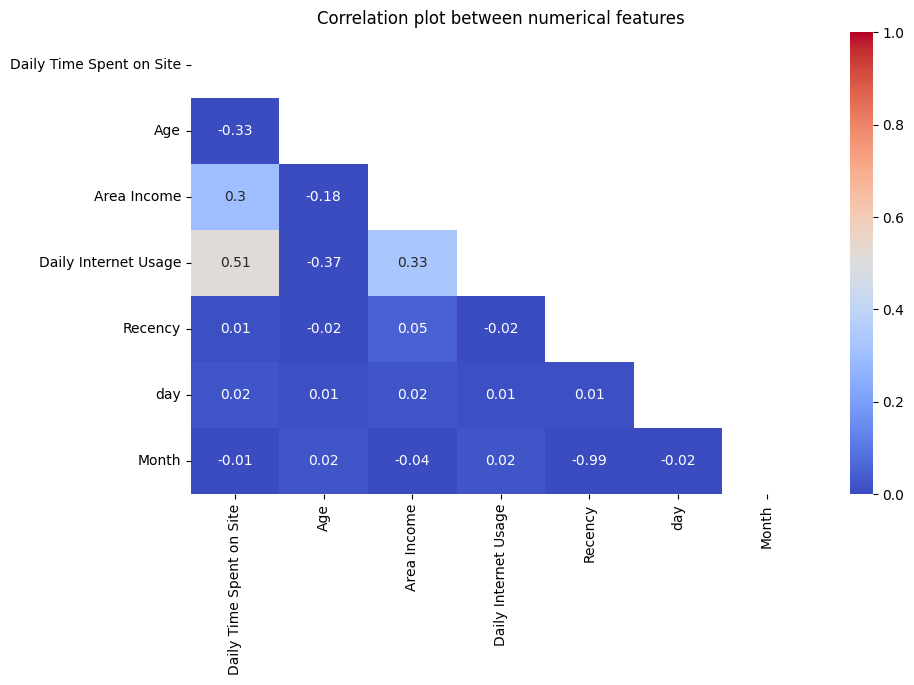

In [30]:
import numpy as np
features = df.select_dtypes(include=['int', 'float']).columns
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(df[features].corr()))
dataplot = sns.heatmap(df[features].corr().round(2), cmap="coolwarm", annot=True, mask=mask, vmin=0, vmax=1)
plt.title('Correlation plot between numerical features')


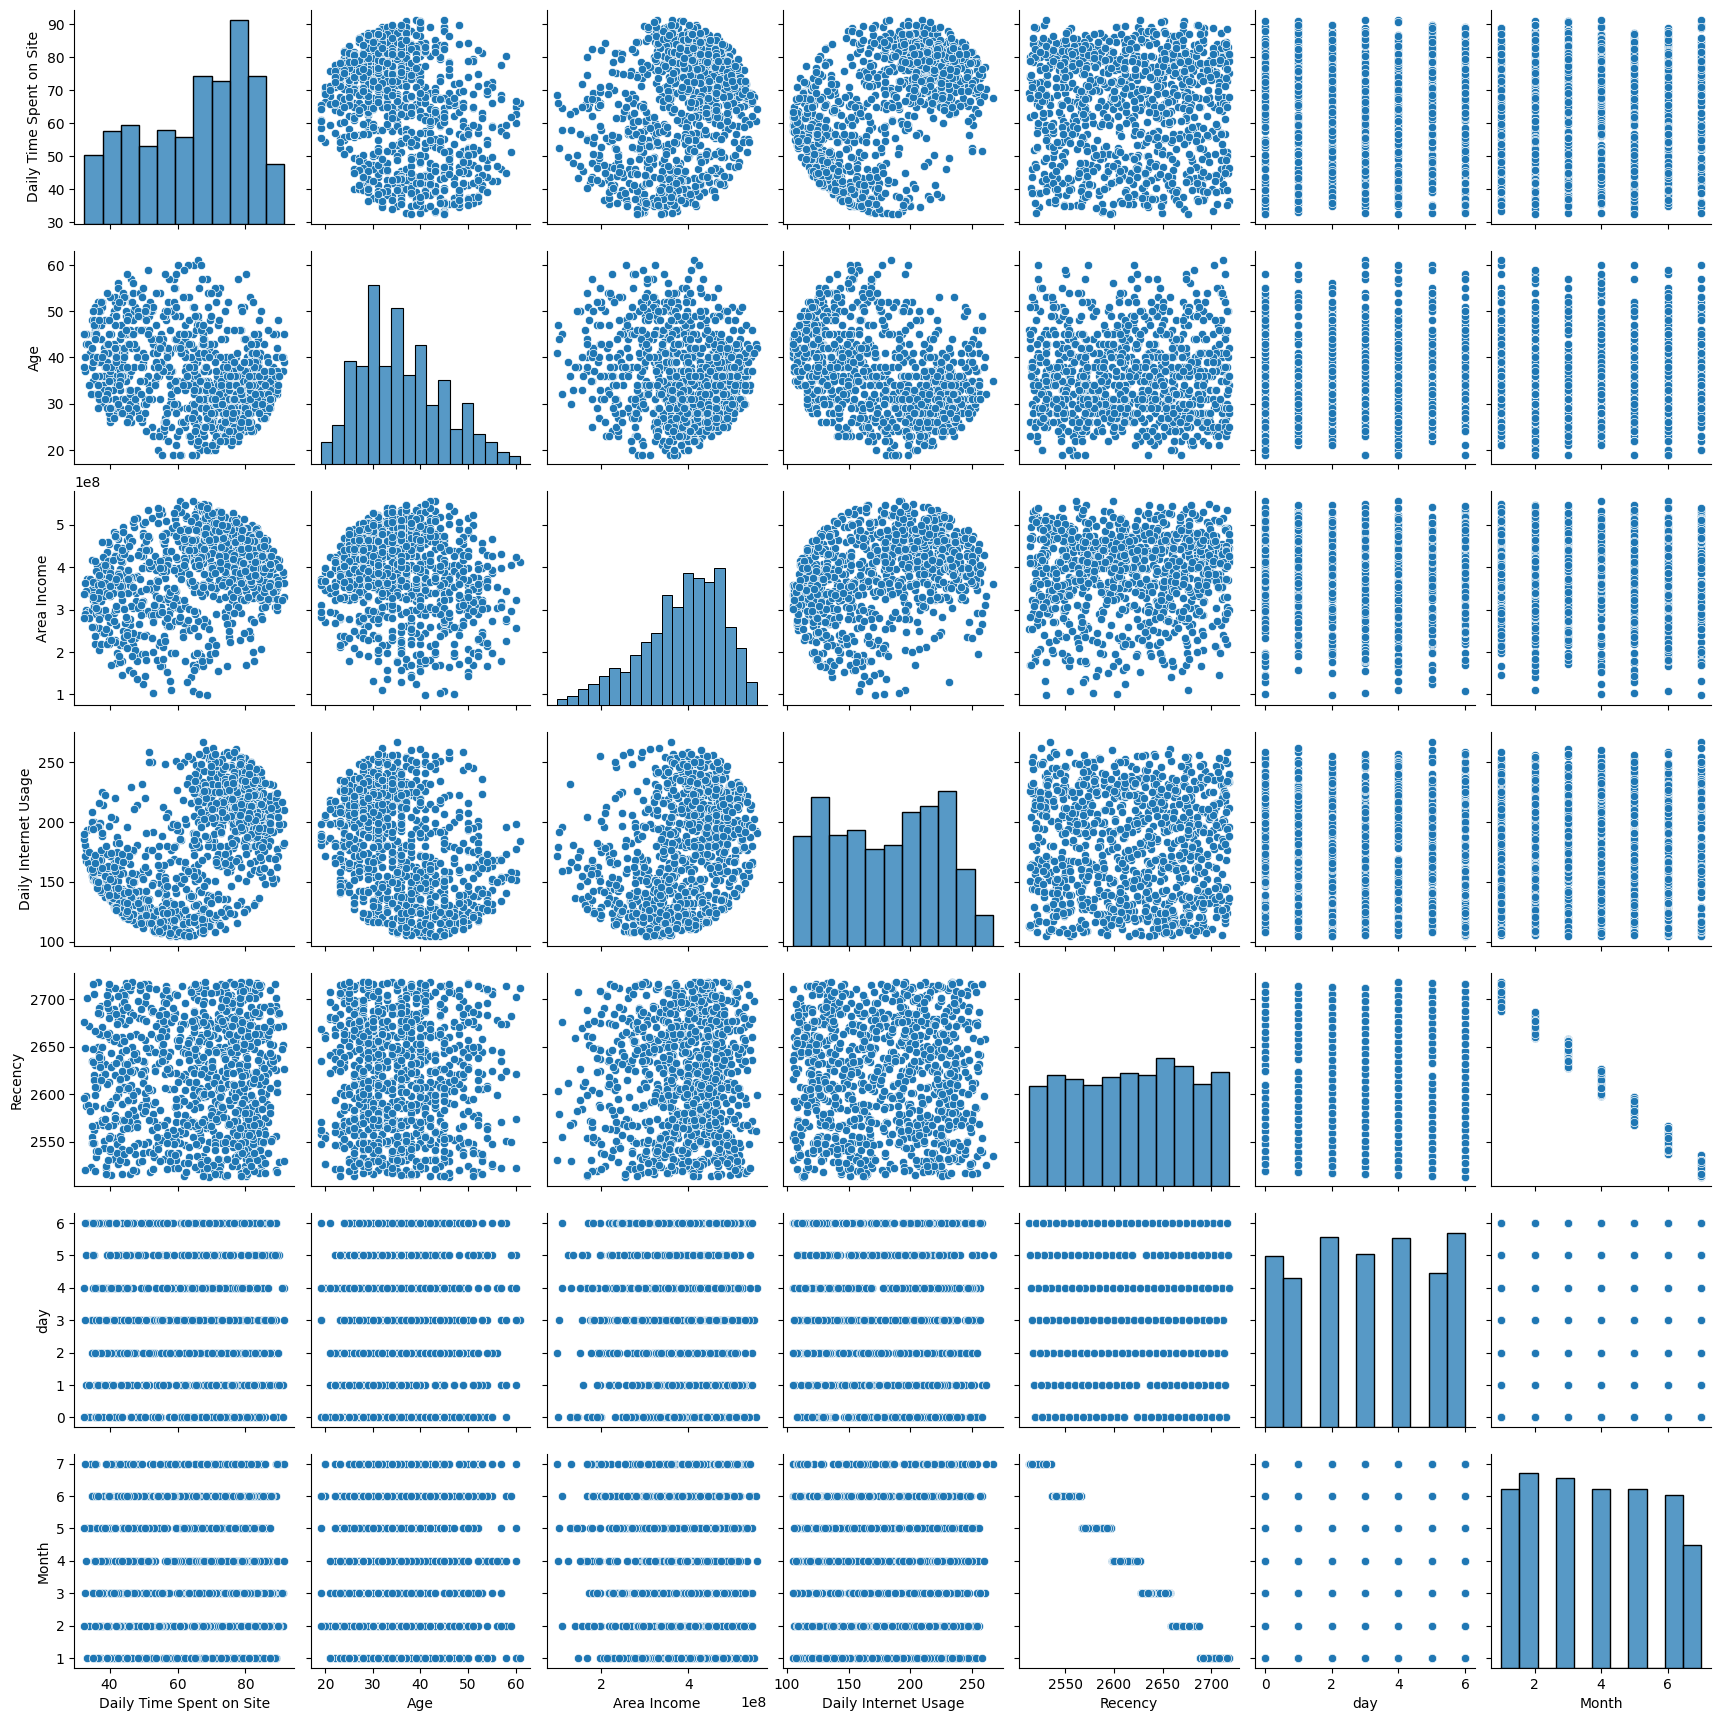

In [31]:
sns.pairplot(df[features])

In [32]:
dfmodel = df.drop(columns = ['city', 'Timestamp', 'province', 'Recency'])
dfmodel['Clicked on Ad'] = dfmodel['Clicked on Ad'].replace({'No':0, 'Yes':1})
dfmodel['Gender'] = dfmodel['Gender'].replace({'Laki-Laki':0, 'Perempuan':1})
dummy_df = pd.get_dummies(dfmodel['category'])
dfmodel = pd.concat([dfmodel, dummy_df], axis=1)
dfmodel = dfmodel.drop('category', axis = 1)

In [33]:
dfmodel.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,day,Month,Bank,Electronic,Fashion,Finance,Food,Furniture,Health,House,Otomotif,Travel
0,68.95,35,432837300.0,256.09,1,0,6,3,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,0,0,0,4,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,1,0,6,3,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,0,0,6,1,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,1,0,4,6,0,0,0,1,0,0,0,0,0,0


In [34]:
#Data preparation
#Splitting data train to features and target dataframe
Feature = dfmodel.drop('Clicked on Ad',axis=1)
Target = dfmodel['Clicked on Ad']

In [35]:
# Checking feature and target dataframe dimension
print('Shape of Feature : ', Feature.shape)
print('Shape of Target : ', Target.shape)

Shape of Feature :  (1000, 17)
Shape of Target :  (1000,)


In [36]:
#Data preparation
#splitting data (70% data train and 30% data test) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Feature, Target, test_size=0.30,random_state=0)

In [37]:
# Checking Train and test dimension
print('Shape of Feature of data train: ', X_train.shape)
print('Shape of Target of data train : ', y_train.shape)
print('Shape of Feature of data test: ', X_test.shape)
print('Shape of Target of data test : ', y_test.shape)

Shape of Feature of data train:  (700, 17)
Shape of Target of data train :  (700,)
Shape of Feature of data test:  (300, 17)
Shape of Target of data test :  (300,)


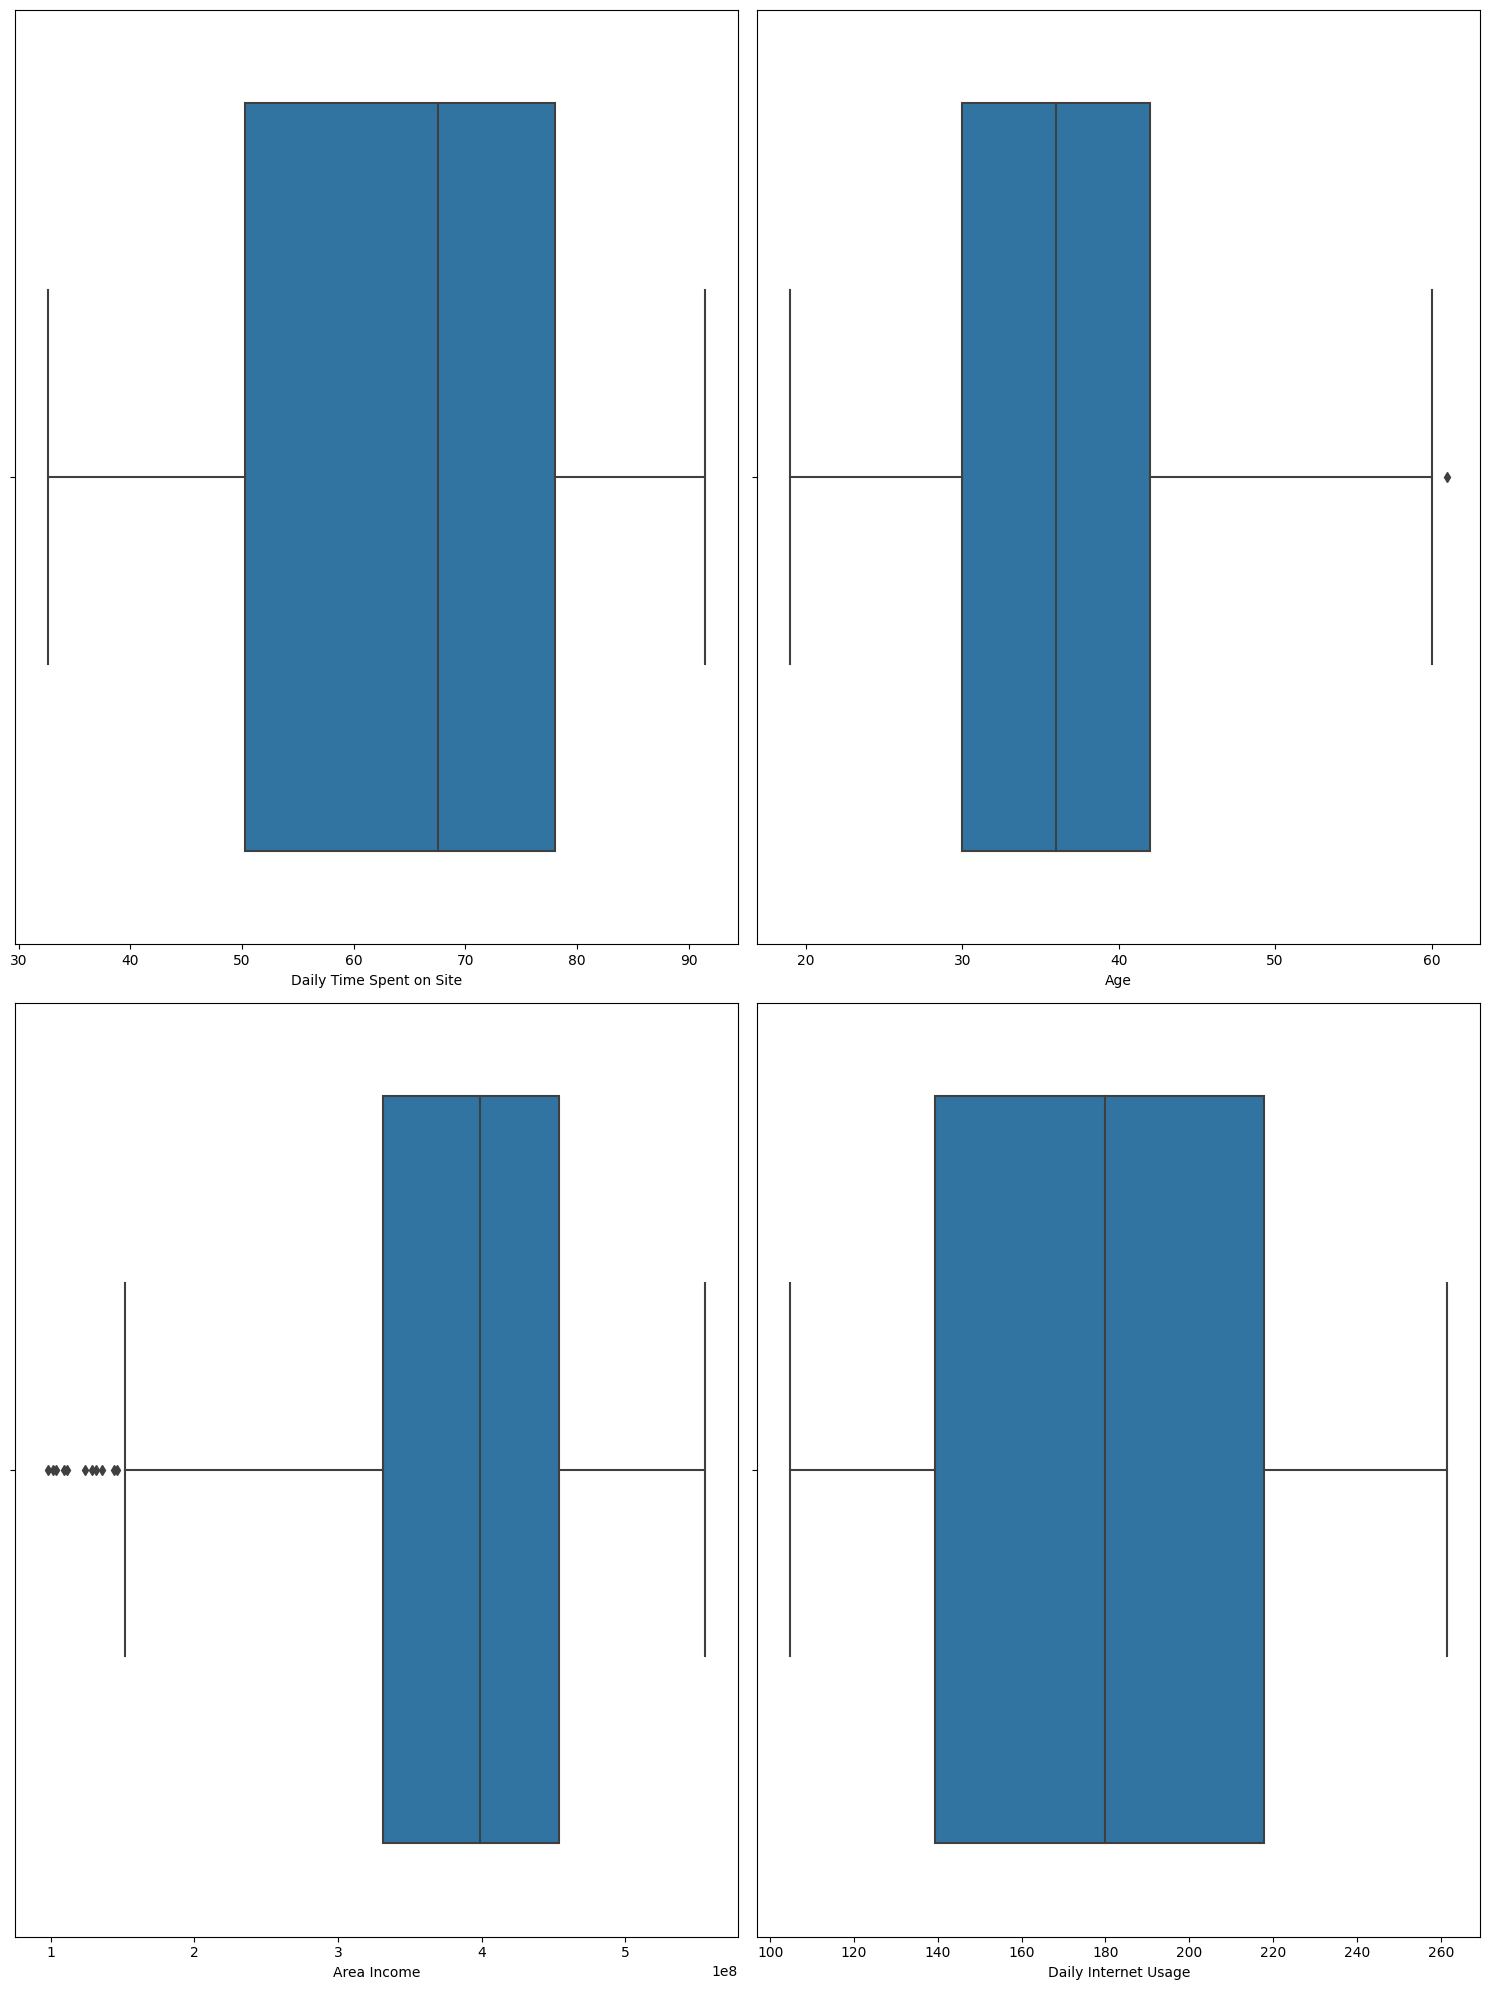

In [38]:
plt.figure(figsize= (15, 20))
feat = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in range(len(feat)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = X_train[feat[i]])
    plt.tight_layout()

In [39]:
Q1 = X_train['Area Income'].quantile(0.25)
Q3 = X_train['Area Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5

In [40]:
# Dilakukan merge feature dan target dari data train terlebih dahulu sebelum dihapus outlier
merge_train = pd.concat([X_train,y_train], axis = 1)
merge_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 105 to 684
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  700 non-null    float64
 1   Age                       700 non-null    int64  
 2   Area Income               700 non-null    float64
 3   Daily Internet Usage      700 non-null    float64
 4   Gender                    700 non-null    int64  
 5   day                       700 non-null    int64  
 6   Month                     700 non-null    int64  
 7   Bank                      700 non-null    uint8  
 8   Electronic                700 non-null    uint8  
 9   Fashion                   700 non-null    uint8  
 10  Finance                   700 non-null    uint8  
 11  Food                      700 non-null    uint8  
 12  Furniture                 700 non-null    uint8  
 13  Health                    700 non-null    uint8  
 14  House   

In [41]:
# Outliers handling
print(f'Jumlah baris sebelum memfilter outlier : {len(X_train)}')
q1 = merge_train['Area Income'].quantile(0.25)
q3 = merge_train['Area Income'].quantile(0.75)
iqr = q3 - q1
low_limit = q1 - (1.5 * iqr)
high_limit = q3 + (1.5 * iqr)
filtered_entries = ((merge_train['Area Income'] >= low_limit) & (merge_train['Area Income'] <= high_limit))
    
merge_train = merge_train[filtered_entries] #filter untuk hanya mengambil value z-score < 3

print(f'Jumlah baris setelah memfilter outlier : {len(merge_train)}')

Jumlah baris sebelum memfilter outlier : 700
Jumlah baris setelah memfilter outlier : 689


In [42]:
# memisahkan dataset train kembali
X_train = merge_train.drop('Clicked on Ad',axis = 1)
y_train = merge_train['Clicked on Ad']

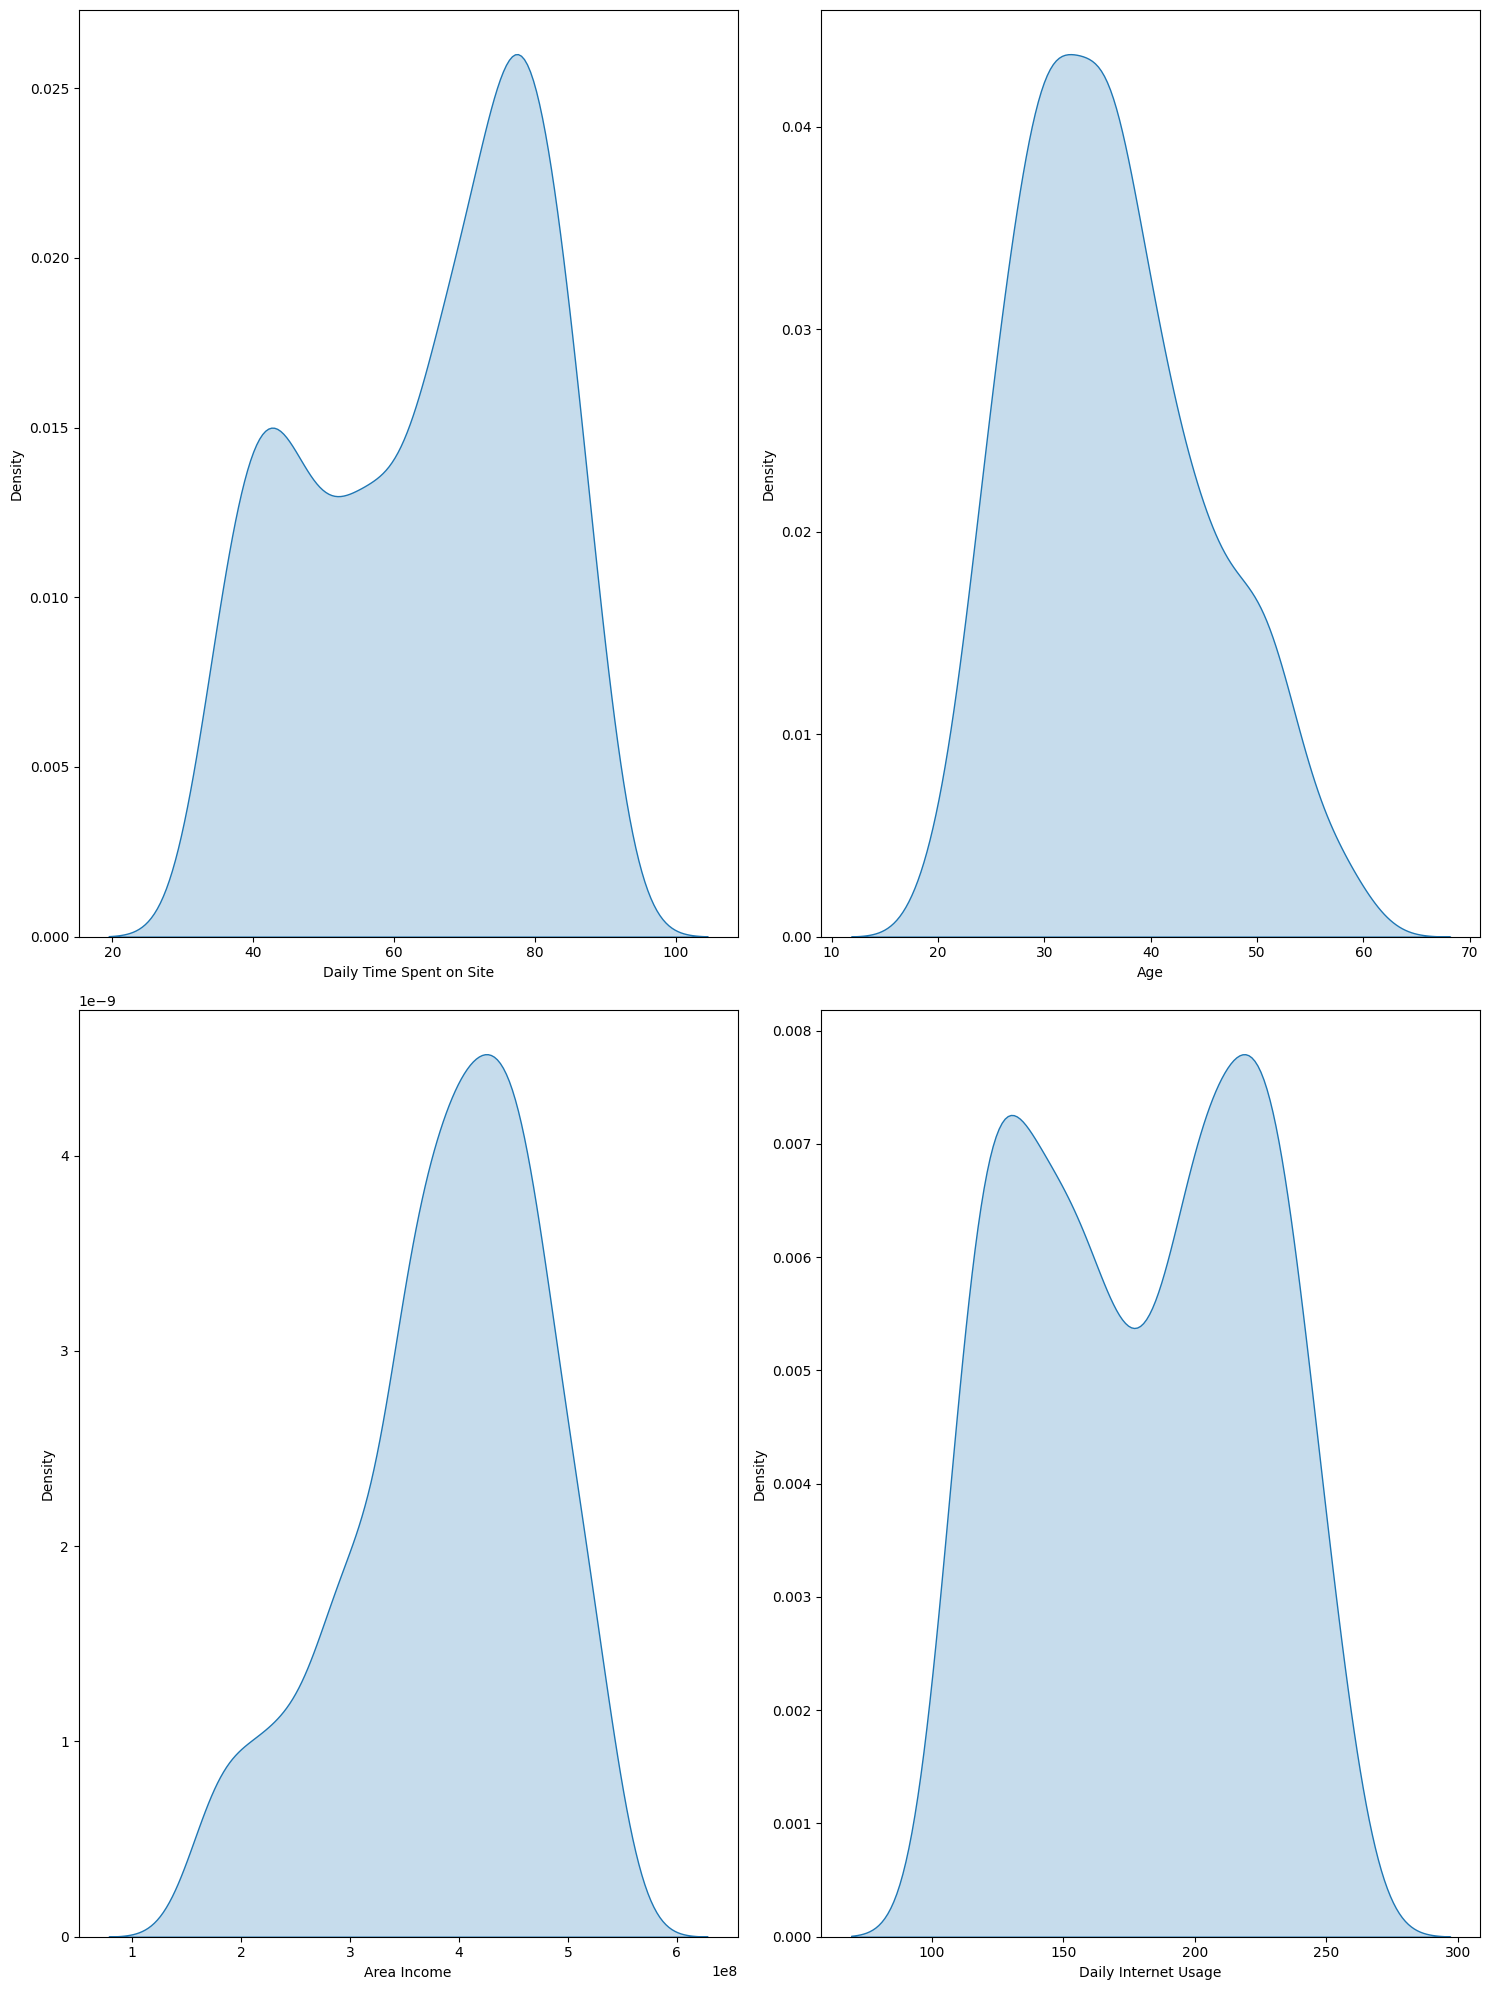

In [43]:
plt.figure(figsize= (15, 20))
feat = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in range(len(feat)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x = X_train[feat[i]], fill = True)
    plt.tight_layout()

In [44]:
# minmax 
minmaxscaler = MinMaxScaler()
X_train[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']] = minmaxscaler.fit_transform(X_train[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']])
X_test[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']] = minmaxscaler.fit_transform(X_test[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']])

In [45]:
display(X_train.head())
display(X_test.head())

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,day,Month,Bank,Electronic,Fashion,Finance,Food,Furniture,Health,House,Otomotif,Travel
105,0.814040,0.500000,0.789455,0.793288,0,6,2,0,0,0,0,0,0,0,0,1,0
68,0.733299,0.142857,0.682314,0.704798,0,5,1,0,0,1,0,0,0,0,0,0,0
479,0.121707,0.214286,0.237585,0.587278,0,0,2,0,0,0,0,0,0,1,0,0,0
399,0.759646,0.190476,0.773486,0.615414,0,0,2,1,0,0,0,0,0,0,0,0,0
434,0.866055,0.476190,0.765704,0.742631,0,2,6,0,0,0,0,0,0,0,0,1,0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,day,Month,Bank,Electronic,Fashion,Finance,Food,Furniture,Health,House,Otomotif,Travel
993,0.516204,0.195122,0.776716,0.756929,0,3,2,1,0,0,0,0,0,0,0,0,0
859,0.853989,0.585366,0.575866,0.860441,0,1,4,0,0,0,0,0,0,0,0,1,0
298,0.804487,0.292683,0.777868,0.677366,1,1,5,0,0,0,0,0,0,1,0,0,0
553,0.169516,0.390244,0.593771,0.139251,0,2,1,0,0,0,0,0,0,0,0,0,1
672,0.961538,0.341463,0.404863,0.651380,1,1,7,0,0,0,0,0,1,0,0,0,0


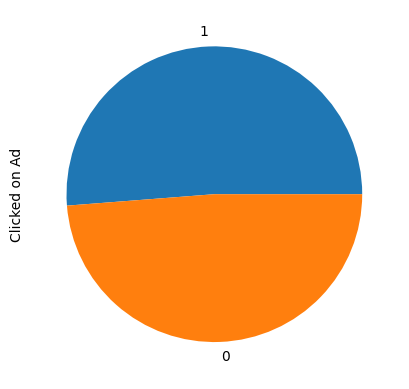

In [46]:
#Data Train's TARGET distribution
y_train.value_counts().plot(kind='pie')
plt.show()

tidak ada imbalance ekstrim

In [47]:
# Define evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm)
    
    print("Confusion Matrix")
    display(cm)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

In [48]:
#Data modeling
#Classification with Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
eval_classification(lr)

Confusion Matrix


,0,1
0,160,4
1,5,131


Accuracy (Test Set): 0.97
Precision (Test Set): 0.97
Recall (Test Set): 0.96
F1-Score (Test Set): 0.97
roc_auc (train-proba): 0.99
roc_auc (test-proba): 0.99


In [49]:
#Data modeling
#Classification with Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)
eval_classification(dt)

Confusion Matrix


,0,1
0,141,23
1,7,129


Accuracy (Test Set): 0.90
Precision (Test Set): 0.85
Recall (Test Set): 0.95
F1-Score (Test Set): 0.90
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.90


In [50]:
#Data modeling
#Classification with XGBoost
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)

xg.fit(X_train, y_train)
eval_classification(xg)

Confusion Matrix


,0,1
0,153,11
1,7,129


Accuracy (Test Set): 0.94
Precision (Test Set): 0.92
Recall (Test Set): 0.95
F1-Score (Test Set): 0.93
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.98


In [51]:
#Data modeling
#Classification with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Confusion Matrix


,0,1
0,153,11
1,5,131


Accuracy (Test Set): 0.95
Precision (Test Set): 0.92
Recall (Test Set): 0.96
F1-Score (Test Set): 0.94
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.99


param value: 0.001; train: 0.9714943342776204; test: 0.9799139167862266
param value: 0.01; train: 0.9883397409955483; test: 0.992691893830703
param value: 0.1; train: 0.9902620396600565; test: 0.9903604734576757
param value: 1; train: 0.9916194523135032; test: 0.9897776183644189
param value: 10; train: 0.9929515715634696; test: 0.9904949784791965
param value: 100; train: 0.9929684338324565; test: 0.9904053084648494


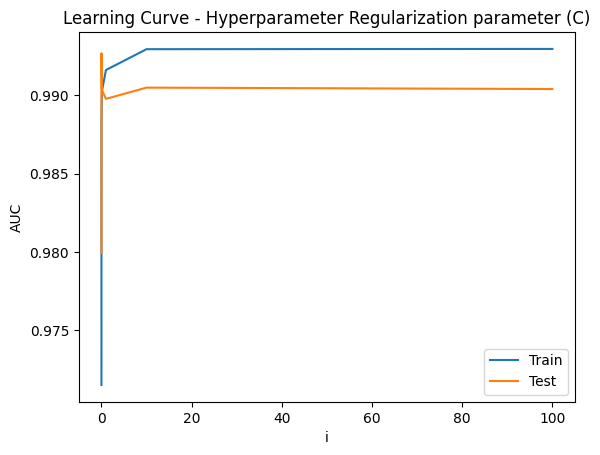

In [52]:
# Learning curve Regularization parameter (C)

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = LogisticRegression(C = i, random_state = 42)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('i')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter Regularization parameter (C)')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [0.001, 0.01, 0.1, 1, 10, 100]
draw_learning_curve(param_values)

param value: 10.0; train: 0.9929515715634696; test: 0.9904949784791965
param value: 10.689655172413794; train: 0.9929684338324565; test: 0.9904949784791965
param value: 11.379310344827587; train: 0.9929768649669499; test: 0.9904949784791965
param value: 12.068965517241379; train: 0.9929768649669499; test: 0.9905846484935438
param value: 12.758620689655173; train: 0.9929937272359368; test: 0.9905398134863702
param value: 13.448275862068966; train: 0.9930021583704303; test: 0.9905846484935438
param value: 14.137931034482758; train: 0.9930021583704303; test: 0.9905846484935438
param value: 14.827586206896552; train: 0.9930105895049237; test: 0.9905398134863702
param value: 15.517241379310345; train: 0.9929937272359368; test: 0.9905398134863702
param value: 16.20689655172414; train: 0.9929937272359368; test: 0.9905398134863702
param value: 16.896551724137932; train: 0.9930021583704303; test: 0.9905846484935438
param value: 17.586206896551722; train: 0.9930190206394173; test: 0.990584648493

c:\Users\una\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\una\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

param value: 23.793103448275865; train: 0.9930274517739107; test: 0.9906294835007173
param value: 24.48275862068966; train: 0.9930274517739107; test: 0.9906294835007173
param value: 25.17241379310345; train: 0.9930190206394173; test: 0.9906294835007173
param value: 25.862068965517242; train: 0.9930274517739107; test: 0.9906294835007173
param value: 26.551724137931036; train: 0.9930274517739107; test: 0.9906294835007173
param value: 27.24137931034483; train: 0.9930105895049237; test: 0.9905846484935438


c:\Users\una\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



param value: 27.931034482758623; train: 0.9929937272359368; test: 0.9905398134863702
param value: 28.620689655172416; train: 0.9929937272359369; test: 0.9905398134863702
param value: 29.310344827586206; train: 0.9929768649669499; test: 0.9904949784791967
param value: 30.0; train: 0.9929852961014435; test: 0.9904949784791967


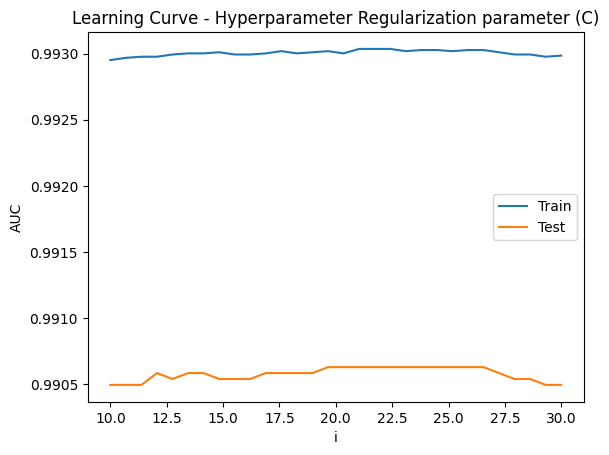

In [53]:
# Learning curve Regularization parameter (C)

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = LogisticRegression(C = i, random_state = 42)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('i')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter Regularization parameter (C)')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [x for x in np.linspace(10,30,30)]
draw_learning_curve(param_values)

In [54]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
hyperparameters = dict(C = [10], penalty = ['l2'])

# Inisialisasi Model
lr = LogisticRegression(random_state=42)
lr_tuning = GridSearchCV(lr, hyperparameters, cv=5, scoring = 'recall')
lr_tuning.fit(X_train, y_train)

# Predict & Evaluation
eval_classification(lr_tuning)

c:\Users\una\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\una\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Confusion Matrix


,0,1
0,159,5
1,5,131


Accuracy (Test Set): 0.97
Precision (Test Set): 0.96
Recall (Test Set): 0.96
F1-Score (Test Set): 0.96
roc_auc (train-proba): 0.99
roc_auc (test-proba): 0.99


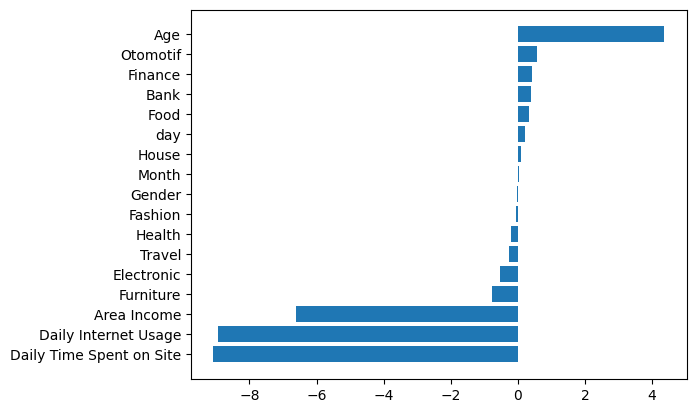

In [55]:
# ambil koefisien fitur dari model terbaik
best_model = lr_tuning.best_estimator_
# membuat DataFrame fitur dan koefisien
feature_coef = pd.DataFrame({'feature': X_train.columns.values, 'coef': best_model.coef_[0]})

# mengurutkan berdasarkan nilai koefisien
feature_coef = feature_coef.sort_values(by='coef', ascending = True)

# menampilkan grafik feature importance
plt.barh(feature_coef['feature'], feature_coef['coef'], orientation='horizontal')
plt.show()

In [56]:
feature_coef

,feature,coef
0,Daily Time Spent on Site,-9.074462
3,Daily Internet Usage,-8.924499
2,Area Income,-6.611108
12,Furniture,-0.783969
8,Electronic,-0.537665
16,Travel,-0.274250
13,Health,-0.191627
9,Fashion,-0.049274
4,Gender,-0.013219
6,Month,0.034058


In [57]:
finaly_pred = lr_tuning.predict(X_test)
finalcm = confusion_matrix(y_test, finaly_pred)
finalcm = pd.DataFrame(finalcm)
finalcm

,0,1
0,159,5
1,5,131


In [58]:
rate = len(y_test[y_test == 1])/len(y_test)
print(rate)
click = finalcm[1][1] + 0.5*finalcm[0][0]
new_rate = click/len(y_test)
print(new_rate)

0.4533333333333333
0.7016666666666667
